In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import plotly.express as px



In [2]:
ad=pd.read_csv("/content/ad_10000records.csv")

In [3]:
ad=ad.drop_duplicates()
ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1
...,...,...,...,...,...,...,...,...,...,...
9994,41.73,28.0,39799.73,217.37,Realigned intangible benchmark,Dustinchester,Female,Zambia,2016-03-20 02:44:13,0
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,2016-01-03 03:22:15,1
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,2016-05-28 12:20:15,0
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,2016-01-05 11:53:17,0


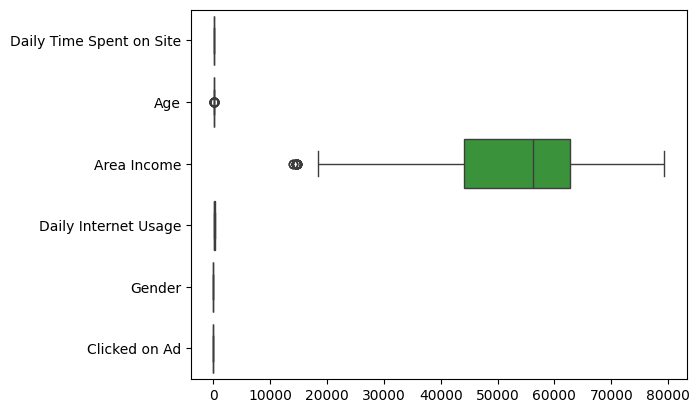

(9785, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9785 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  9785 non-null   float64
 1   Age                       9785 non-null   float64
 2   Area Income               9785 non-null   float64
 3   Daily Internet Usage      9785 non-null   float64
 4   Gender                    9785 non-null   int64  
 5   Country                   9785 non-null   object 
 6   Clicked on Ad             9785 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 611.6+ KB
None
       Daily Time Spent on Site          Age   Area Income  \
count               9785.000000  9785.000000   9785.000000   
mean                  61.601379    35.839550  53948.143348   
std                   15.698216     8.538524  13360.051625   
min                   32.600000    19.000000  13996.500000   
25%       

In [4]:
ad["Gender"] = ad["Gender"].map({"Male": 1,"Female": 0})
ad=ad.drop(['City','Timestamp','Ad Topic Line'],axis=1)
sns.boxplot(data=ad,orient='h')
plt.show()
print(ad.shape)
print(ad.info())
print(ad.describe())

In [ ]:
le=LabelEncoder()
ad["country"]=le.fit_transform(ad["Country"])
c1_map={index: label for index,label in enumerate(le.classes_)}
print(c1_map)
ad.drop(['Country'],axis=1,inplace=True)
print(ad.info())

In [ ]:
counts=ad['country'].value_counts()
Country_m= counts.reset_index()
Country_m.columns= ['country', 'Count']

merged= pd.merge(ad,Country_m,on='country')
print(merged)
plt.figure(figsize=(8,6))

In [ ]:
merged1 = merged.assign(Group_1=lambda x: x['Count'].apply(lambda val: 1 if val >= 300 else 0))
merged1= merged1.assign(Group_2=lambda x: x['Count'].apply(lambda val: 1 if val >= 200 and val < 300 else 0))
merged1 = merged1.assign(Group_3=lambda x: x['Count'].apply(lambda val: 1 if val >= 100 and val < 200 else 0))
merged1 = merged1.assign(Group_4=lambda x: x['Count'].apply(lambda val: 1 if val >= 0 and val < 100 else 0))



print(merged1)

sns.heatmap(merged1.corr(),annot=True,cmap='coolwarm',fmt="0.2f",annot_kws={"size":12})
plt.title('Correlation matrix')
plt.show()




fig = px.box(merged1,
             x="Daily Internet Usage",
             color="Clicked on Ad",
             title="Click Through Rate based on Daily Internet Usage",
             color_discrete_map={'Yes':'blue',
                                 'No':'red'})
fig.update_traces(quartilemethod="exclusive")
fig.show()





In [ ]:
fig = px.box(merged1,
             x="Age",
             color="Clicked on Ad",
             title="Click Through Rate based on Age",
             color_discrete_map={'Yes':'blue',
                                 'No':'red'})
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [ ]:
fig = px.box(merged1,
             x="Daily Time Spent on Site",
             color="Clicked on Ad",
             title="Click Through Rate based Time Spent on Site",
             color_discrete_map={'Yes':'blue',
                                 'No':'red'})
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [ ]:
fig = px.box(merged1,
             x="Area Income",
             color="Clicked on Ad",
             title="Click Through Rate based Area Income",
             color_discrete_map={'Yes':'blue',
                                 'No':'red'})
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [ ]:
outliers_col=["Area Income","Age"]
for column in outliers_col:
  if merged1[column].dtype in ["int64","float64"]:
    Q1=merged1[column].quantile(0.25)
    Q3=merged1[column].quantile(0.75)
    iqr=Q3-Q1
    lower_bound=Q1-1.5*iqr
    upper_bound=Q3+1.5+iqr
    merged1=merged1[(merged1[column]>=lower_bound) & (merged1[column]<=upper_bound)]
    print(merged1)
merged1['Area Income'].plot(kind='box')
plt.xticks(rotation=90)
plt.show()

merged1['Age'].plot(kind='box')
plt.xticks(rotation=90)
plt.show()


In [ ]:

X=merged1.drop(['Clicked on Ad'], axis=1)
y=merged1['Clicked on Ad']


models=[]
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('RF',RandomForestClassifier()))
models.append(('SVM',svm.SVC()))

results=[]
names=[]
scoring='accuracy'
kfold=KFold(n_splits=10)
for name,model in models:
    cv_results=cross_val_score(model,X,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('cv results:',cv_results)
    print(f"accuracy of {name} is {cv_results.mean()}")

fig=plt.figure()
fig.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(results)

ax.set_xticklabels(names)
plt.show()



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train1=scaler.fit_transform(X_train)
X_test1=scaler.transform(X_test)

print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)
print(y.shape)
print(X.shape)

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)


random_forest_model.fit(X_train1, y_train)


y_pred = random_forest_model.predict(X_test1)
print(y_pred)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print("Classification Report:\n", classification_report(y_test, y_pred))
print("conf_matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
plt.subplot(2,2,1)
plt.scatter(x=y_test, y=y_pred, color='b')

plt.show()

In [ ]:
print("Ads Click Through Rate Prediction : ")
New_data={
    'Daily Time Spent on Site': float(input("Daily Time Spent on Site: ")),
    'Age': float(input("Age: ")),
    'Area Income': float(input("Area Income: ")),
    'Daily Internet Usage': float(input("Daily Internet Usage: ")),
    'Gender': input("Gender (Male = 1, Female = 0) : ")
}
features = pd.DataFrame(New_data)

# Scale the new data and convert it to a 2D array
new_data_scaled = scaler.transform(features.values.reshape(1, -1))

# Make predictions
predictions = rf.predict(new_data_scaled)

print("Will the user click on ad =", predictions)